# Taxi Prediction

# Business problem:

Given pickup and dropoff locations, the pickup timestamp, and the passenger count, the objective is to predict the fare of the taxi ride

## Features in Dataset
<table>
	<tr>
		<th>Field Name</th>
		<th>Description</th>
	</tr>
	<tr>
		<td>VendorID</td>
		<td>
		A code indicating the TPEP provider that provided the record.
		<ol>
			<li>Creative Mobile Technologies</li>
			<li>VeriFone Inc.</li>
		</ol>
		</td>
	</tr>
	<tr>
		<td>tpep_pickup_datetime</td>
		<td>The date and time when the meter was engaged.</td>
	</tr>
	<tr>
		<td>tpep_dropoff_datetime</td>
		<td>The date and time when the meter was disengaged.</td>
	</tr>
	<tr>
		<td>Passenger_count</td>
		<td>The number of passengers in the vehicle. This is a driver-entered value.</td>
	</tr>
	<tr>
		<td>Trip_distance</td>
		<td>The elapsed trip distance in miles reported by the taximeter.</td>
	</tr>
	<tr>
		<td>Pickup_longitude</td>
		<td>Longitude where the meter was engaged.</td>
	</tr>
	<tr>
		<td>Pickup_latitude</td>
		<td>Latitude where the meter was engaged.</td>
	</tr>
	<tr>
		<td>RateCodeID</td>
		<td>The final rate code in effect at the end of the trip.
		<ol>
			<li> Standard rate </li>
			<li> JFK </li>
			<li> Newark </li>
			<li> Nassau or Westchester</li>
			<li> Negotiated fare </li>
			<li> Group ride</li>
		</ol>
		</td>
	</tr>
	<tr>
		<td>Store_and_fwd_flag</td>
		<td>This flag indicates whether the trip record was held in vehicle memory before sending to the vendor,<br\> aka “store and forward,” because the vehicle did not have a connection to the server.
		<br\>Y= store and forward trip
		<br\>N= not a store and forward trip
		</td>
	</tr>

	<tr>
		<td>Dropoff_longitude</td>
		<td>Longitude where the meter was disengaged.</td>
	</tr>
	<tr>
		<td>Dropoff_ latitude</td>
		<td>Latitude where the meter was disengaged.</td>
	</tr>
	<tr>
		<td>Payment_type</td>
		<td>A numeric code signifying how the passenger paid for the trip.
		<ol>
			<li> Credit card </li>
			<li> Cash </li>
			<li> No charge </li>
			<li> Dispute</li>
			<li> Unknown </li>
			<li> Voided trip</li>
		</ol>
		</td>
	</tr>
	<tr>
		<td>Fare_amount</td>
		<td>The time-and-distance fare calculated by the meter.</td>
	</tr>
	<tr>
		<td>Extra</td>
		<td>Miscellaneous extras and surcharges. Currently, this only includes. the $0.50 and $1 rush hour and overnight charges.</td>
	</tr>
	<tr>
		<td>MTA_tax</td>
		<td>0.50 MTA tax that is automatically triggered based on the metered rate in use.</td>
	</tr>
	<tr>
		<td>Improvement_surcharge</td>
		<td>0.30 improvement surcharge assessed trips at the flag drop. the improvement surcharge began being levied in 2015.</td>
	</tr>
	<tr>
		<td>Tip_amount</td>
		<td>Tip amount – This field is automatically populated for credit card tips.Cash tips are not included.</td>
	</tr>
	<tr>
		<td>Tolls_amount</td>
		<td>Total amount of all tolls paid in trip.</td>
	</tr>
	<tr>
		<td>Total_amount</td>
		<td>The total amount charged to passengers. Does not include cash tips.</td>
	</tr>
</table>

# Machine Learning Problem :

As mentioned our goal is to predict the fare of taxi ride.Two important preprocessing tasks are involved:
1. Binning data into 10 mins interval(Since the average time taken to travel 1 mile is 10 minutes in any of the region)
2. Break NYC into clusters(regions)  
It is a Time-Series forecasting and regression problem.

# Performance metrics :

1. Mean Absolute percentage error(MAPE).  
2. Mean Squared error(MSE).

# Load Data

In [143]:
import warnings
warnings.filterwarnings("ignore")

In [144]:
import pandas as pd
import dask.dataframe as dd
import numpy as np

data_2015 = dd.read_csv(r'C:\Users\Friend\AI\AI_datasets\Taxi_Prediction\yellow_tripdata_2015-01.csv')
data_2015.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

In [145]:
print(len(data_2015))
print(len(data_2015.columns))

12748986
19


In [146]:
data_2015.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


# Exploratory Data Analysis on features :

* pickup_latitude & pickup_longitude

In [105]:
#Removal of outliers(pickup_latitude & pickup_longitude)

outlier_locations = data_2015[((data_2015.pickup_longitude <= -74.15) | (data_2015.pickup_latitude <= 40.5774)| \
                   (data_2015.pickup_longitude >= -73.7004) | (data_2015.pickup_latitude >= 40.9176))]


len(outlier_locations)

247742

* dropoff_latitude & dropoff_longitude

In [106]:
#Removal of outliers(dropoff_latitude & dropoff_longitude)

outlier_locations = data_2015[((data_2015.dropoff_longitude <= -74.15) | (data_2015.dropoff_latitude <= 40.5774)| \
                   (data_2015.dropoff_longitude >= -73.7004) | (data_2015.dropoff_latitude >= 40.9176))]

len(outlier_locations)

264440

* trip_times(tpep_pickup_datetime & tpep_dropoff_datetime)

In [147]:
import datetime
import time

def convert_to_unix(s):
    return time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").timetuple())

def return_with_trip_times(data_2015):
    duration = data_2015[['tpep_pickup_datetime','tpep_dropoff_datetime']].compute()
    duration_pickup = [convert_to_unix(x) for x in duration['tpep_pickup_datetime'].values]
    duration_drop = [convert_to_unix(x) for x in duration['tpep_dropoff_datetime'].values]
    durations = (np.array(duration_drop) - np.array(duration_pickup))/float(60)
    
    new_frame = data_2015[['passenger_count','trip_distance','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','total_amount']].compute()
    
    new_frame['trip_times'] = durations
    new_frame['pickup_times'] = duration_pickup
    new_frame['Speed'] = 60*(new_frame['trip_distance']/new_frame['trip_times'])
    
    return new_frame


frame_with_durations = return_with_trip_times(data_2015)

In [109]:
for i in range(0,100,10):
    var =frame_with_durations["trip_times"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is -1211.0166666666667
10 percentile value is 3.8333333333333335
20 percentile value is 5.383333333333334
30 percentile value is 6.816666666666666
40 percentile value is 8.3
50 percentile value is 9.95
60 percentile value is 11.866666666666667
70 percentile value is 14.283333333333333
80 percentile value is 17.633333333333333
90 percentile value is 23.45
100 percentile value is  548555.6333333333


In [110]:
for i in range(90,100):
    var =frame_with_durations["trip_times"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 23.45
91 percentile value is 24.35
92 percentile value is 25.383333333333333
93 percentile value is 26.55
94 percentile value is 27.933333333333334
95 percentile value is 29.583333333333332
96 percentile value is 31.683333333333334
97 percentile value is 34.46666666666667
98 percentile value is 38.71666666666667
99 percentile value is 46.75
100 percentile value is  548555.6333333333


In [111]:
for i in np.arange(0.0, 1.0, 0.1):
    var =frame_with_durations["trip_times"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 46.75
99.1 percentile value is 48.06666666666667
99.2 percentile value is 49.56666666666667
99.3 percentile value is 51.28333333333333
99.4 percentile value is 53.31666666666667
99.5 percentile value is 55.833333333333336
99.6 percentile value is 59.13333333333333
99.7 percentile value is 63.9
99.8 percentile value is 71.86666666666666
99.9 percentile value is 101.6
100 percentile value is  548555.6333333333


In [112]:
#Removal of Outlier(Trip time)

frame_with_durations_modified = frame_with_durations[(frame_with_durations.trip_times>1) & (frame_with_durations.trip_times<720)]

* Trip speed

In [113]:
frame_with_durations_modified['Speed'] = 60*(frame_with_durations_modified['trip_distance']/frame_with_durations_modified['trip_times'])

C:\Users\Friend\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [114]:
for i in range(0,100,10):
    var =frame_with_durations_modified["Speed"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 0.0
10 percentile value is 6.409495548961425
20 percentile value is 7.80952380952381
30 percentile value is 8.929133858267717
40 percentile value is 9.98019801980198
50 percentile value is 11.06865671641791
60 percentile value is 12.286689419795222
70 percentile value is 13.796407185628745
80 percentile value is 15.963224893917962
90 percentile value is 20.186915887850468
100 percentile value is  192857142.85714284


In [115]:
for i in range(90,100):
    var =frame_with_durations_modified["Speed"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 20.186915887850468
91 percentile value is 20.91645569620253
92 percentile value is 21.752988047808763
93 percentile value is 22.721893491124263
94 percentile value is 23.844155844155843
95 percentile value is 25.182552504038775
96 percentile value is 26.80851063829787
97 percentile value is 28.84304932735426
98 percentile value is 31.591128254580514
99 percentile value is 35.7513566847558
100 percentile value is  192857142.85714284


In [116]:
for i in np.arange(0.0, 1.0, 0.1):
    var =frame_with_durations_modified["Speed"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 35.7513566847558
99.1 percentile value is 36.31084727468969
99.2 percentile value is 36.91470054446461
99.3 percentile value is 37.588235294117645
99.4 percentile value is 38.33035714285714
99.5 percentile value is 39.17580340264651
99.6 percentile value is 40.15384615384615
99.7 percentile value is 41.338301043219076
99.8 percentile value is 42.86631016042781
99.9 percentile value is 45.3107822410148
100 percentile value is  192857142.85714284


In [117]:
#Removal of Outlier(Trip Speed)

frame_with_durations_modified=frame_with_durations[(frame_with_durations.Speed>0) & (frame_with_durations.Speed<44.37)]

* Trip Distance

In [118]:
for i in range(0,100,10):
    var =frame_with_durations_modified["trip_distance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 0.01
10 percentile value is 0.66
20 percentile value is 0.9
30 percentile value is 1.1
40 percentile value is 1.39
50 percentile value is 1.69
60 percentile value is 2.07
70 percentile value is 2.6
80 percentile value is 3.6
90 percentile value is 5.94
100 percentile value is  258.9


In [119]:
for i in range(90,100):
    var =frame_with_durations_modified["trip_distance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 5.94
91 percentile value is 6.42
92 percentile value is 7.04
93 percentile value is 7.8
94 percentile value is 8.7
95 percentile value is 9.6
96 percentile value is 10.59
97 percentile value is 12.04
98 percentile value is 15.96
99 percentile value is 18.13
100 percentile value is  258.9


In [120]:
for i in np.arange(0.0, 1.0, 0.1):
    var =frame_with_durations_modified["trip_distance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 18.13
99.1 percentile value is 18.33
99.2 percentile value is 18.56
99.3 percentile value is 18.8
99.4 percentile value is 19.1
99.5 percentile value is 19.49
99.6 percentile value is 19.91
99.7 percentile value is 20.5
99.8 percentile value is 21.2
99.9 percentile value is 22.5
100 percentile value is  258.9


In [121]:
#Removal of Outlier(Trip distance)

frame_with_durations_modified = frame_with_durations[(frame_with_durations.trip_distance>0) & (frame_with_durations.trip_distance<22.6)]

* Total Fare

In [122]:
for i in range(0,100,10):
    var = frame_with_durations_modified["total_amount"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is -242.55
10 percentile value is 6.3
20 percentile value is 7.8
30 percentile value is 8.8
40 percentile value is 9.8
50 percentile value is 11.16
60 percentile value is 12.8
70 percentile value is 14.8
80 percentile value is 18.3
90 percentile value is 25.8
100 percentile value is  3950611.6


In [123]:
for i in range(90,100):
    var = frame_with_durations_modified["total_amount"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 25.8
91 percentile value is 27.3
92 percentile value is 29.16
93 percentile value is 31.63
94 percentile value is 34.8
95 percentile value is 38.4
96 percentile value is 42.42
97 percentile value is 48.09
98 percentile value is 58.13
99 percentile value is 66.13
100 percentile value is  3950611.6


In [126]:
for i in np.arange(0.0, 1.0, 0.1):
    var = frame_with_durations_modified["total_amount"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 66.13
99.1 percentile value is 68.13
99.2 percentile value is 69.6
99.3 percentile value is 69.6
99.4 percentile value is 69.73
99.5 percentile value is 69.75
99.6 percentile value is 69.76
99.7 percentile value is 72.46
99.8 percentile value is 75.33
99.9 percentile value is 88.05
100 percentile value is  3950611.6


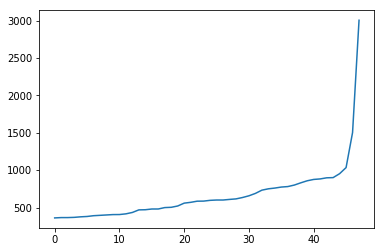

In [128]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.plot(var[-50:-2])
plt.show()

# Remove Outliers

In [148]:
def remove_outliers(new_frame):
    new_frame = new_frame[((new_frame.dropoff_longitude >= -74.15) & (new_frame.dropoff_longitude <= -73.7004) &\
                       (new_frame.dropoff_latitude >= 40.5774) & (new_frame.dropoff_latitude <= 40.9176)) & \
                       ((new_frame.pickup_longitude >= -74.15) & (new_frame.pickup_latitude >= 40.5774)& \
                       (new_frame.pickup_longitude <= -73.7004) & (new_frame.pickup_latitude <= 40.9176))]
    
    new_frame = new_frame[(new_frame.trip_times > 0) & (new_frame.trip_times < 720)]
    new_frame = new_frame[(new_frame.trip_distance > 0) & (new_frame.trip_distance < 23)]
    new_frame = new_frame[(new_frame.Speed < 45.31) & (new_frame.Speed > 0)]
    new_frame = new_frame[(new_frame.total_amount <1000) & (new_frame.total_amount >0)]
    return new_frame
  
frame_with_durations_outliers_removed = remove_outliers(frame_with_durations)

print("fraction of data points that remain after removing outliers", float(len(frame_with_durations_outliers_removed))/len(frame_with_durations))

fraction of data points that remain after removing outliers 0.9703576425607495


# Clustering :

In [149]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
import gpxpy.geo

coords = frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']].values
neighbours=[]

def find_min_distance(cluster_centers, cluster_len):
    nice_points = 0
    wrong_points = 0
    less2 = []
    more2 = []
    min_dist=1000
    for i in range(0, cluster_len):
        nice_points = 0
        wrong_points = 0
        for j in range(0, cluster_len):
            if j!=i:
                distance = gpxpy.geo.haversine_distance(cluster_centers[i][0], cluster_centers[i][1],cluster_centers[j][0], cluster_centers[j][1])
                min_dist = min(min_dist,distance/(1.60934*1000))
                if (distance/(1.60934*1000)) <= 2:
                    nice_points +=1
                else:
                    wrong_points += 1
        less2.append(nice_points)
        more2.append(wrong_points)
    neighbours.append(less2)
    print ("On choosing a cluster size of ",cluster_len,"\nAvg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2):", np.ceil(sum(less2)/len(less2)), "\nAvg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2):", np.ceil(sum(more2)/len(more2)),"\nMin inter-cluster distance = ",min_dist,"\n---")

def find_clusters(increment):
    kmeans = MiniBatchKMeans(n_clusters=increment, batch_size=10000,random_state=42).fit(coords)
    frame_with_durations_outliers_removed['pickup_cluster'] = kmeans.predict(frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']])
    cluster_centers = kmeans.cluster_centers_
    cluster_len = len(cluster_centers)
    return cluster_centers, cluster_len

for increment in range(10, 100, 10):
    cluster_centers, cluster_len = find_clusters(increment)
    find_min_distance(cluster_centers, cluster_len) 

On choosing a cluster size of  10 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 2.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 8.0 
Min inter-cluster distance =  1.0945442325142543 
---
On choosing a cluster size of  20 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 4.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 16.0 
Min inter-cluster distance =  0.7131298007387813 
---
On choosing a cluster size of  30 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 8.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 22.0 
Min inter-cluster distance =  0.5185088176172206 
---
On choosing a cluster size of  40 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 8.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 32.0 
Min inter-cluster distance 

In [150]:
kmeans = MiniBatchKMeans(n_clusters=40, batch_size=10000,random_state=0).fit(coords)
frame_with_durations_outliers_removed['pickup_cluster'] = kmeans.predict(frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']])

In [151]:
frame_with_durations_outliers_removed.head()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,trip_times,pickup_times,Speed,pickup_cluster
0,1,1.59,-73.993896,40.750111,-73.974785,40.750618,17.05,18.050000,1.421370e+09,5.285319,34
1,1,3.30,-74.001648,40.724243,-73.994415,40.759109,17.80,19.833333,1.420944e+09,9.983193,2
2,1,1.80,-73.963341,40.802788,-73.951820,40.824413,10.80,10.050000,1.420944e+09,10.746269,16
3,1,0.50,-74.009087,40.713818,-74.004326,40.719986,4.80,1.866667,1.420944e+09,16.071429,38
4,1,3.00,-73.971176,40.762428,-74.004181,40.742653,16.30,19.316667,1.420944e+09,9.318378,22


# Time Binning

In [152]:
def add_pickup_bins(frame,data_2015,year):
    unix_pickup_times=[i for i in frame['pickup_times'].values]
    unix_times = [[1420070400,1422748800,1425168000,1427846400,1430438400,1433116800],\
                    [1451606400,1454284800,1456790400,1459468800,1462060800,1464739200]]
    
    start_pickup_unix=unix_times[year-2015][data_2015-1]
    tenminutewise_binned_unix_pickup_times=[(int((i-start_pickup_unix)/600)+33) for i in unix_pickup_times]
    frame['pickup_bins'] = np.array(tenminutewise_binned_unix_pickup_times)
    return frame

In [153]:
jan_2015_frame = add_pickup_bins(frame_with_durations_outliers_removed,1,2015)
jan_2015_groupby = jan_2015_frame[['pickup_cluster','pickup_bins','trip_distance']].groupby(['pickup_cluster','pickup_bins']).count()
jan_2015_frame.head()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,trip_times,pickup_times,Speed,pickup_cluster,pickup_bins
0,1,1.59,-73.993896,40.750111,-73.974785,40.750618,17.05,18.050000,1.421370e+09,5.285319,34,2199
1,1,3.30,-74.001648,40.724243,-73.994415,40.759109,17.80,19.833333,1.420944e+09,9.983193,2,1488
2,1,1.80,-73.963341,40.802788,-73.951820,40.824413,10.80,10.050000,1.420944e+09,10.746269,16,1488
3,1,0.50,-74.009087,40.713818,-74.004326,40.719986,4.80,1.866667,1.420944e+09,16.071429,38,1488
4,1,3.00,-73.971176,40.762428,-74.004181,40.742653,16.30,19.316667,1.420944e+09,9.318378,22,1488


In [154]:
jan_2015_groupby.head()

trip_distance
pickup_cluster pickup_bins               
0              69                     104
               70                     200
               71                     208
               72                     141
               73                     155

# Smoothing

In [155]:
def return_unq_pickup_bins(frame):
    values = []
    for i in range(0,40):
        new = frame[frame['pickup_cluster'] == i]
        list_unq = list(set(new['pickup_bins']))
        list_unq.sort()
        values.append(list_unq)
    return values

jan_2015_unique = return_unq_pickup_bins(jan_2015_frame)

In [156]:
import math

def fill_missing(count_values,values):
    smoothed_regions=[]
    ind=0
    for r in range(0,40):
        smoothed_bins=[]
        for i in range(4464):
            if i in values[r]:
                smoothed_bins.append(count_values[ind])
                ind+=1
            else:
                smoothed_bins.append(0)
        smoothed_regions.extend(smoothed_bins)
    return smoothed_regions

def smoothing(count_values,values):
    smoothed_regions=[] # stores list of final smoothed values of each reigion
    ind=0
    repeat=0 
    smoothed_value=0
    for r in range(0,40):
        smoothed_bins=[] #stores the final smoothed values
        repeat=0
        for i in range(4464):
            if repeat!=0: # prevents iteration for a value which is already visited/resolved
                repeat-=1
                continue
            if i in values[r]: #checks if the pickup-bin exists 
                smoothed_bins.append(count_values[ind]) # appends the value of the pickup bin if it exists
            else:
                if i!=0:
                    right_hand_limit=0
                    for j in range(i,4464):
                        if  j not in values[r]: #searches for the left-limit or the pickup-bin value which has a pickup value
                            continue
                        else:
                            right_hand_limit=j
                            break
                    if right_hand_limit==0:
                    #Case 1: When we have the last/last few values are found to be missing,hence we have no right-limit here
                        smoothed_value=count_values[ind-1]*1.0/((4463-i)+2)*1.0                               
                        for j in range(i,4464):                              
                            smoothed_bins.append(math.ceil(smoothed_value))
                        smoothed_bins[i-1] = math.ceil(smoothed_value)
                        repeat=(4463-i)
                        ind-=1
                    else:
                    #Case 2: When we have the missing values between two known values
                        smoothed_value=(count_values[ind-1]+count_values[ind])*1.0/((right_hand_limit-i)+2)*1.0             
                        
                        for j in range(i,right_hand_limit+1):
                            smoothed_bins.append(math.ceil(smoothed_value))
                        smoothed_bins[i-1] = math.ceil(smoothed_value)
                        repeat=(right_hand_limit-i)
                else:
                    #Case 3: When we have the first/first few values are found to be missing,hence we have no left-limit here
                    right_hand_limit=0
                    for j in range(i,4464):
                        if  j not in values[r]:
                            continue
                        else:
                            right_hand_limit=j
                            break
                    smoothed_value=count_values[ind]*1.0/((right_hand_limit-i)+1)*1.0
                    for j in range(i,right_hand_limit+1):
                            smoothed_bins.append(math.ceil(smoothed_value))
                    repeat=(right_hand_limit-i)
            ind+=1
        smoothed_regions.extend(smoothed_bins)
    return smoothed_regions

In [157]:
jan_2015_fill = fill_missing(jan_2015_groupby['trip_distance'].values,jan_2015_unique)
jan_2015_smooth = smoothing(jan_2015_groupby['trip_distance'].values,jan_2015_unique)

In [158]:
len(jan_2015_smooth)

178560

# Data Preparation

In [159]:
def datapreparation(data_2015,kmeans,month_no,year_no):
    frame_with_durations = return_with_trip_times(data_2015)
    frame_with_durations_outliers_removed = remove_outliers(frame_with_durations)
    frame_with_durations_outliers_removed['pickup_cluster'] = kmeans.predict(frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']])
    final_updated_frame = add_pickup_bins(frame_with_durations_outliers_removed,month_no,year_no)
    final_groupby_frame = final_updated_frame[['pickup_cluster','pickup_bins','trip_distance']].groupby(['pickup_cluster','pickup_bins']).count()
    
    return final_updated_frame,final_groupby_frame

In [160]:
month_jan_2016 = dd.read_csv(r'C:\Users\Friend\AI\AI_datasets\Taxi_Prediction\yellow_tripdata_2016-01.csv')
jan_2016_frame,jan_2016_groupby = datapreparation(month_jan_2016,kmeans,1,2016)
jan_2016_unique = return_unq_pickup_bins(jan_2016_frame)
jan_2016_smooth = fill_missing(jan_2016_groupby['trip_distance'].values,jan_2016_unique)

In [161]:
month_feb_2016 = dd.read_csv(r'C:\Users\Friend\AI\AI_datasets\Taxi_Prediction\yellow_tripdata_2016-02.csv')
feb_2016_frame,feb_2016_groupby = datapreparation(month_feb_2016,kmeans,2,2016)
feb_2016_unique = return_unq_pickup_bins(feb_2016_frame)
feb_2016_smooth = fill_missing(feb_2016_groupby['trip_distance'].values,feb_2016_unique)

In [162]:
month_mar_2016 = dd.read_csv(r'C:\Users\Friend\AI\AI_datasets\Taxi_Prediction\yellow_tripdata_2016-03.csv')
mar_2016_frame,mar_2016_groupby = datapreparation(month_mar_2016,kmeans,3,2016)
mar_2016_unique = return_unq_pickup_bins(mar_2016_frame)
mar_2016_smooth = fill_missing(mar_2016_groupby['trip_distance'].values,mar_2016_unique)

In [163]:
ratios_jan = pd.DataFrame()
ratios_jan['Given']=jan_2015_smooth
ratios_jan['Prediction']=jan_2016_smooth
ratios_jan['Ratios']=ratios_jan['Prediction']*1.0/ratios_jan['Given']*1.0

In [164]:
ratios_jan.shape

(178560, 3)

# Exponential weighted Moving Average

In [165]:
def EA_R1_Predictions(ratios,data_2015):
    predicted_ratio=(ratios['Ratios'].values)[0]
    alpha=0.6
    error=[]
    predicted_values=[]
    predicted_ratio_values=[]
    for i in range(0,4464*40):
        if i%4464==0:
            predicted_ratio_values.append(0)
            predicted_values.append(0)
            error.append(0)
            continue
        predicted_ratio_values.append(predicted_ratio)
        predicted_values.append(int(((ratios['Given'].values)[i])*predicted_ratio))
        error.append(abs((math.pow(int(((ratios['Given'].values)[i])*predicted_ratio)-(ratios['Prediction'].values)[i],1))))
        predicted_ratio = (alpha*predicted_ratio) + (1-alpha)*((ratios['Ratios'].values)[i])
    
    ratios['EA_R1_Predicted'] = predicted_values
    ratios['EA_R1_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    return ratios,mape_err,mse_err

def EA_P1_Predictions(ratios,data_2015):
    predicted_value= (ratios['Prediction'].values)[0]
    alpha=0.3
    error=[]
    predicted_values=[]
    for i in range(0,4464*40):
        if i%4464==0:
            predicted_values.append(0)
            error.append(0)
            continue
        predicted_values.append(predicted_value)
        error.append(abs((math.pow(predicted_value-(ratios['Prediction'].values)[i],1))))
        predicted_value =int((alpha*predicted_value) + (1-alpha)*((ratios['Prediction'].values)[i]))
    
    ratios['EA_P1_Predicted'] = predicted_values
    ratios['EA_P1_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    return ratios,mape_err,mse_err

In [166]:
mean_err=[0]*2
median_err=[0]*2

ratios_jan,mean_err[0],median_err[0]=EA_R1_Predictions(ratios_jan,'jan')
ratios_jan,mean_err[1],median_err[1]=EA_P1_Predictions(ratios_jan,'jan')

In [167]:
print(mean_err)

[0.2801125176779463, 0.15716114877006163]


In [168]:
regions_cum = []

for i in range(0,40):
    regions_cum.append(jan_2016_smooth[4464*i:4464*(i+1)]+feb_2016_smooth[4176*i:4176*(i+1)]+mar_2016_smooth[4464*i:4464*(i+1)])

In [169]:
number_of_time_stamps = 5
output = []
tsne_lat = []
tsne_lon = []
tsne_weekday = []
tsne_feature = []

tsne_feature = [0]*number_of_time_stamps
for i in range(0,40):
    tsne_lat.append([kmeans.cluster_centers_[i][0]]*13099)
    tsne_lon.append([kmeans.cluster_centers_[i][1]]*13099)
    # jan 1st 2016 is thursday, so we start our day from 4: "(int(k/144))%7+4"
    # our prediction start from 5th 10min intravel since we need to have number of pickups that are happened in last 5 pickup bins
    tsne_weekday.append([int(((int(k/144))%7+4)%7) for k in range(5,4464+4176+4464)])
    # regions_cum is a list of lists [[x1,x2,x3..x13104], [x1,x2,x3..x13104], [x1,x2,x3..x13104], [x1,x2,x3..x13104], [x1,x2,x3..x13104], .. 40 lsits]
    tsne_feature = np.vstack((tsne_feature, [regions_cum[i][r:r+number_of_time_stamps] for r in range(0,len(regions_cum[i])-number_of_time_stamps)]))
    output.append(regions_cum[i][5:])
tsne_feature = tsne_feature[1:]

# Fourier Transform as Featurization

In [170]:
ampli_fourier = []
freq_fourier = []
for i in range(40):
    ampli  = np.abs(np.fft.fft(regions_cum[i]))
    freq = np.abs(np.fft.fftfreq(13104, 1))
    ampli_indices = np.argsort(-ampli)[1:]
    amplitude = []
    frequency = []
    for j in range(0,5,1):
        amplitude.append(ampli[ampli_indices[j]])
        frequency.append(freq[ampli_indices[j]])
    for k in range(13099):
        ampli_fourier.append(amplitude)
        freq_fourier.append(frequency) 

In [171]:
ampli_fourier[0]

[352892.24492958514,
 352892.24492958514,
 189333.3058368882,
 189333.3058368882,
 80556.42829136703]

# Data Split

In [172]:
alpha=0.3
predicted_values=[]

predict_list = []
tsne_flat_exp_avg = []
for r in range(0,40):
    for i in range(0,13104):
        if i==0:
            predicted_value= regions_cum[r][0]
            predicted_values.append(0)
            continue
        predicted_values.append(predicted_value)
        predicted_value =int((alpha*predicted_value) + (1-alpha)*(regions_cum[r][i]))
    predict_list.append(predicted_values[5:])
    predicted_values=[]

In [173]:
train_features =  [tsne_feature[i*13099:(13099*i+9169)] for i in range(0,40)]
test_features = [tsne_feature[(13099*(i))+9169:13099*(i+1)] for i in range(0,40)]

In [174]:
train_fourier_frequencies = [freq_fourier[i*13099:(13099*i+9169)] for i in range(40)]
test_fourier_frequencies = [freq_fourier[(13099*(i))+9169:13099*(i+1)] for i in range(40)]

In [175]:
train_fourier_amplitudes = [ampli_fourier[i*13099:(13099*i+9169)] for i in range(40)]
test_fourier_amplitudes = [ampli_fourier[(13099*(i))+9169:13099*(i+1)] for i in range(40)]

In [176]:
tsne_train_flat_lat = [i[:9169] for i in tsne_lat]
tsne_train_flat_lon = [i[:9169] for i in tsne_lon]
tsne_train_flat_weekday = [i[:9169] for i in tsne_weekday]
tsne_train_flat_output = [i[:9169] for i in output]
tsne_train_flat_exp_avg = [i[:9169] for i in predict_list]

tsne_test_flat_lat = [i[9169:] for i in tsne_lat]
tsne_test_flat_lon = [i[9169:] for i in tsne_lon]
tsne_test_flat_weekday = [i[9169:] for i in tsne_weekday]
tsne_test_flat_output = [i[9169:] for i in output]
tsne_test_flat_exp_avg = [i[9169:] for i in predict_list]

In [177]:
train_new_features = []
for i in range(0,40):
    train_new_features.extend(train_features[i])
test_new_features = []
for i in range(0,40):
    test_new_features.extend(test_features[i])

In [178]:
train_freq = []
for i in range(0,40):
    train_freq.extend(train_fourier_frequencies[i])
test_freq = []
for i in range(0,40):
    test_freq.extend(train_fourier_frequencies[i])

In [179]:
train_amp = []
for i in range(0,40):
    train_amp.extend(train_fourier_amplitudes[i])
test_amp = []
for i in range(0,40):
    test_amp.extend(test_fourier_amplitudes[i])

In [180]:
tsne_train_lat = sum(tsne_train_flat_lat, [])
tsne_train_lon = sum(tsne_train_flat_lon, [])
tsne_train_weekday = sum(tsne_train_flat_weekday, [])
tsne_train_output = sum(tsne_train_flat_output, [])
tsne_train_exp_avg = sum(tsne_train_flat_exp_avg,[])

tsne_test_lat = sum(tsne_test_flat_lat, [])
tsne_test_lon = sum(tsne_test_flat_lon, [])
tsne_test_weekday = sum(tsne_test_flat_weekday, [])
tsne_test_output = sum(tsne_test_flat_output, [])
tsne_test_exp_avg = sum(tsne_test_flat_exp_avg,[])

In [181]:
columns = ['amp1','amp2','amp3','amp4','amp5']
amp_train = pd.DataFrame(data=train_amp, columns=columns)
print(amp_train.shape)

columns = ['amp1','amp2','amp3','amp4','amp5']
amp_test = pd.DataFrame(data=test_amp, columns=columns)
print(amp_test.shape)

(366760, 5)
(157200, 5)


In [182]:
columns = ['freq1','freq2','freq3','freq4','freq5']
freq_train = pd.DataFrame(data=train_freq, columns=columns)
print(freq_train.shape)

columns = ['freq1','freq2','freq3','freq4','freq5']
freq_test = pd.DataFrame(data=test_freq, columns=columns)
print(freq_test.shape)

(366760, 5)
(366760, 5)


In [183]:
columns = ['ft_5','ft_4','ft_3','ft_2','ft_1']
df_train = pd.DataFrame(data=train_new_features, columns=columns) 
df_train['lat'] = tsne_train_lat
df_train['lon'] = tsne_train_lon
df_train['weekday'] = tsne_train_weekday
df_train['exp_avg'] = tsne_train_exp_avg
print(df_train.shape)

df_test = pd.DataFrame(data=test_new_features, columns=columns) 
df_test['lat'] = tsne_test_lat
df_test['lon'] = tsne_test_lon
df_test['weekday'] = tsne_test_weekday
df_test['exp_avg'] = tsne_test_exp_avg
print(df_test.shape)

(366760, 9)
(157200, 9)


In [184]:
df_train = df_train.join(freq_train)
df_train = df_train.join(amp_train)

df_train.shape

(366760, 19)

In [185]:
df_train.tail()

,ft_5,ft_4,ft_3,ft_2,ft_1,lat,lon,weekday,exp_avg,freq1,freq2,freq3,freq4,freq5,amp1,amp2,amp3,amp4,amp5
366755,67,64,85,87,128,40.734208,-73.993977,4,114,0.000153,0.000153,0.006868,0.006868,0.000076,121351.934522,121351.934522,98076.01479,98076.01479,92844.540973
366756,64,85,87,128,94,40.734208,-73.993977,4,100,0.000153,0.000153,0.006868,0.006868,0.000076,121351.934522,121351.934522,98076.01479,98076.01479,92844.540973
366757,85,87,128,94,82,40.734208,-73.993977,4,87,0.000153,0.000153,0.006868,0.006868,0.000076,121351.934522,121351.934522,98076.01479,98076.01479,92844.540973
366758,87,128,94,82,85,40.734208,-73.993977,4,85,0.000153,0.000153,0.006868,0.006868,0.000076,121351.934522,121351.934522,98076.01479,98076.01479,92844.540973
366759,128,94,82,85,78,40.734208,-73.993977,4,80,0.000153,0.000153,0.006868,0.006868,0.000076,121351.934522,121351.934522,98076.01479,98076.01479,92844.540973


In [186]:
df_test = df_test.join(freq_test)
df_test = df_test.join(amp_test)

df_test.shape

(157200, 19)

In [187]:
df_test.tail()

,ft_5,ft_4,ft_3,ft_2,ft_1,lat,lon,weekday,exp_avg,freq1,freq2,freq3,freq4,freq5,amp1,amp2,amp3,amp4,amp5
157195,77,85,81,92,77,40.734208,-73.993977,3,80,0.006944,0.006944,0.000076,0.000076,0.013889,121351.934522,121351.934522,98076.01479,98076.01479,92844.540973
157196,85,81,92,77,97,40.734208,-73.993977,3,91,0.006944,0.006944,0.000076,0.000076,0.013889,121351.934522,121351.934522,98076.01479,98076.01479,92844.540973
157197,81,92,77,97,79,40.734208,-73.993977,3,82,0.006944,0.006944,0.000076,0.000076,0.013889,121351.934522,121351.934522,98076.01479,98076.01479,92844.540973
157198,92,77,97,79,92,40.734208,-73.993977,3,88,0.006944,0.006944,0.000076,0.000076,0.013889,121351.934522,121351.934522,98076.01479,98076.01479,92844.540973
157199,77,97,79,92,83,40.734208,-73.993977,3,84,0.006944,0.006944,0.000076,0.000076,0.013889,121351.934522,121351.934522,98076.01479,98076.01479,92844.540973


# Regression models

In [188]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Linear Regression

In [189]:
from sklearn.linear_model import SGDRegressor

Grid_Parameters = {'alpha' : [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]}

clf_linear = GridSearchCV(SGDRegressor(loss = "squared_loss", penalty = "l2"),Grid_Parameters,cv =5)
clf_linear.fit(df_train, tsne_train_output)
alpha = clf_linear.best_params_["alpha"]

print(alpha)

0.0001


In [190]:
clf_linear = SGDRegressor(loss = "squared_loss", penalty = "l2", alpha = alpha)
clf_linear.fit(df_train, tsne_train_output)

train_y_pred = clf_linear.predict(df_train)
test_y_pred = clf_linear.predict(df_test)

In [191]:
train_error_linear = mean_absolute_error(tsne_train_output, train_y_pred)/(sum(tsne_train_output)/len(tsne_train_output))
test_error_linear = mean_absolute_error(tsne_test_output, test_y_pred)/(sum(tsne_test_output)/len(tsne_test_output))

# Random Forests

In [2]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

grid_hyperparameter = [{'n_estimators'  : [50,100,1000,2000],'max_depth':[5,10]}]

clf = GridSearchCV(RandomForestClassifier(max_features='sqrt',min_samples_leaf=4,min_samples_split=3), grid_hyperparameter, cv=2)
clf.fit(df_train, tsne_train_output)

clf_n = clf.best_estimator_.get_params()['n_estimators']
clf_depth = clf.best_estimator_.get_params()['max_depth']

print(clf_n,clf_depth)

1000 10


In [ ]:
clf_RF = RandomForestRegressor(max_features='sqrt',min_samples_leaf=4,min_samples_split=3,n_estimators=clf_n,max_depth = clf_depth)
clf_RF.fit(df_train, tsne_train_output)

train_y_pred = clf_RF.predict(df_train)
test_y_pred = clf_RF.predict(df_test)

In [ ]:
train_error_RF = mean_absolute_error(tsne_train_output,train_y_pred)/(sum(tsne_train_output)/len(tsne_train_output))
test_error_RF = mean_absolute_error(tsne_test_output, test_y_pred)/(sum(tsne_test_output)/len(tsne_test_output))

# XG Boost

In [ ]:
import xgboost as xgb

grid_hyperparameter = [{'n_estimators'  : [50,100,1000,2000],'max_depth':[5,10]}]

x_model = xgb.XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=3,
 gamma=0,
 subsample=0.8,
 reg_alpha=200, reg_lambda=200,
 colsample_bytree=0.8,nthread=4)

clf_XG = GridSearchCV(x_model, grid_hyperparameter, cv=2)
clf_XG.fit(df_train, tsne_train_output)

clf_n = clf_XG.best_estimator_.get_params()['n_estimators']
clf_depth = clf_XG.best_estimator_.get_params()['max_depth']

In [ ]:
clf_XG =  xgb.XGBRegressor(
 learning_rate =0.1,
 n_estimators=clf_n,
 max_depth=clf_depth,
 min_child_weight=3,
 gamma=0,
 subsample=0.8,
 reg_alpha=200, reg_lambda=200,
 colsample_bytree=0.8,nthread=4)
regr1.fit(df_train, tsne_train_output)

train_y_pred = clf_XG.predict(df_train)
test_y_pred = clf_XG.predict(df_test)

In [ ]:
train_error_xg = mean_absolute_error(tsne_train_output,train_y_pred)/(sum(tsne_train_output)/len(tsne_train_output))
test_error_xg = mean_absolute_error(tsne_test_output, test_y_pred)/(sum(tsne_test_output)/len(tsne_test_output))

# Conclusion

In [1]:
from prettytable import PrettyTable
    
Table = PrettyTable()

Table.field_names  = ["Model","Train error", "Test error"]

Table.add_row(["Linear Regression", train_error_linear,test_error_linear])
Table.add_row(["Random Forest",train_error_RF, test_error_RF])
Table.add_row(["XGBoost",train_error_xg,test_error_xg])

print(Table)

+-------------------+-----------------+----------------+
|       Model       |   Train error   |   Test error   |
+-------------------+-----------------+----------------+
| Linear Regression |  0.113648123791 | 0.129361804204 |
|   Random Forest   | 0.0717619563182 | 0.124542461769 |
|      XGBoost      |  0.119387790351 | 0.115742475694 |
+-------------------+-----------------+----------------+
